In [1]:
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
num_samples = 9

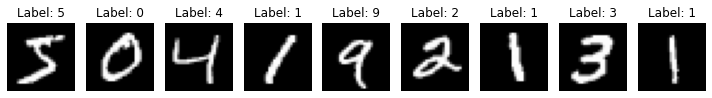

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [11]:
# Model 1: Simple CNN
model1 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
# Model 2: LeNet-5
model2 = tf.keras.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
# Model 3: Custom architecture
model3 = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
_, acc1 = model1.evaluate(x_test, y_test)
_, acc2 = model2.evaluate(x_test, y_test)
_, acc3 = model3.evaluate(x_test, y_test)

""" using the syntax _ to disregard the test loss value and only assign the test accuracy
value to the corresponding variables acc1, acc2, and acc3, 
using _ as a variable name, we are indicating that we are not interested in storing or using the test loss value. """

313/313 [==============================] - 1s 4ms/step - loss: 2.3413 - accuracy: 0.0761


In [16]:
table = {
    'Model': ['Simple CNN', 'LeNet-5', 'Custom Architecture'],
    'Accuracy': [acc1, acc2, acc3],
    'Number of Parameters': [model1.count_params(), model2.count_params(), model3.count_params()]
} 
#table dictionary provides a convenient data structure to store and organize the results of the different models,
#facilitating easy access, comparison, and analysis of the relevant information

In [17]:
print("\nComparison Table:")
print("-" * 47)
print("| {:<20s} | {:<10s} | {:<20s} |".format("Model", "Accuracy", "Number of Parameters"))
print("-" * 47)
for i in range(len(table['Model'])):
    print("| {:<20s} | {:<10.2f}% | {:<20d} |".format(table['Model'][i], table['Accuracy'][i] * 100, table['Number of Parameters'][i]))
print("-" * 47)


Comparison Table:
-----------------------------------------------
| Model                | Accuracy   | Number of Parameters |
-----------------------------------------------
| Simple CNN           | 11.46     % | 347146               |
| LeNet-5              | 5.81      % | 44426                |
| Custom Architecture  | 7.61      % | 56714                |
-----------------------------------------------
